## Importing the libraries

In [244]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading the dataset

In [245]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [246]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [247]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [248]:
X = pd.DataFrame(dataset[['Age','EstimatedSalary']])
y = dataset["Purchased"]

In [249]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [250]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Print count of each label in Purchased column

In [251]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

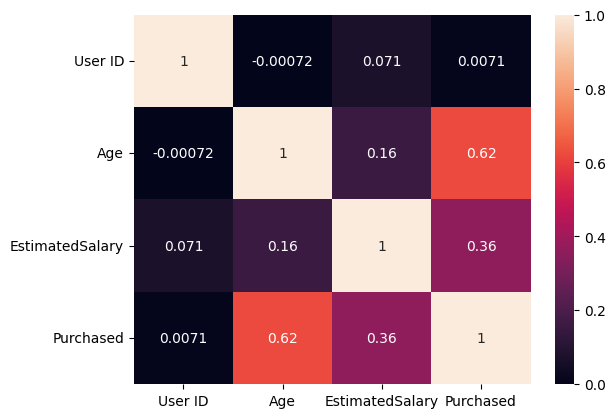

In [252]:
# dataset.corr()
sns.heatmap(data=dataset.corr(), annot=True);

# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [253]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)

## Train the model with random_state = 0

In [254]:
lr = LogisticRegression()
lr.fit(X=X_train,y=y_train)

LogisticRegression()

## Print the prediction results

In [255]:
pred = lr.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Create dataframe with the Actual Purchased and Predict Purchased

In [256]:
test_dataset = X_test.copy()
test_dataset['Predict_Purchased'] = pred
test_dataset['Actual_Purchased'] = y_test
# test_dataset
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
146,27,96000
135,23,63000
390,48,33000
264,48,90000


In [257]:
(test_dataset['Actual_Purchased'] == test_dataset['Predict_Purchased']).value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [258]:
print(confusion_matrix(y_pred=pred,y_true=y_test))

[[68  0]
 [32  0]]


In [259]:
ac1 = accuracy_score(y_test,pred)
ac1

0.68

In [260]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



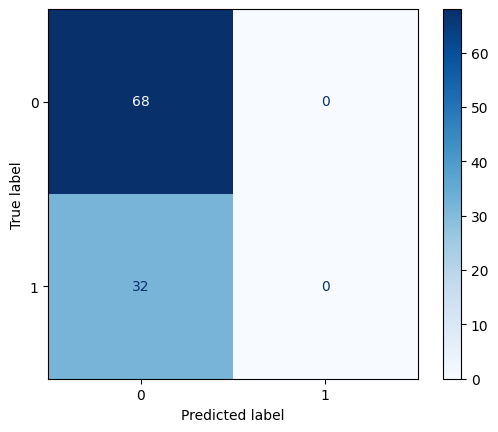

In [261]:
plot_confusion_matrix(lr,X=X_test, y_true=y_test, cmap='Blues');
plt.show()

## Use StandardScaler() to improved performance and re-train your model

In [262]:

dataset2=dataset.copy()
dataset2=dataset2.drop('Gender',axis=1)
sts = StandardScaler()
dataset2 = pd.DataFrame(sts.fit_transform(dataset2),columns = dataset2.columns)
#dataset2['Gender']=dataset['Gender']
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    float64
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    float64
dtypes: float64(4)
memory usage: 12.6 KB


In [276]:
X=dataset2[['Age','EstimatedSalary']]
y=dataset2['Purchased'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
lr2 = LogisticRegression()
lr2.fit(X_train,y_train)
y_pred = lr2.predict(X_test)

In [277]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [273]:

X_test3 = pd.DataFrame([[30,90000]],columns=['Age','Salary'])
print(lr2.predict(X_test3))


[1]


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [274]:
X_test4 = pd.DataFrame([[40,90000]],columns=['Age','Salary'])
print(lr2.predict(X_test4))

[1]


# Second: k-nearest neighbors model

In [239]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X=X_test)

# highest_ac = 0.0
# highest_k = 1
# for i in range(1,11):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train,y_train)
#     pred_knn = knn.predict(X=X_test)
#     ac = accuracy_score(y_pred=X_test,y_true=pred_knn)
#     if ac > highest_ac:
#         highest_ac = ac
#         highest_k = i


In [240]:
print(classification_report(y_true=y_test,y_pred=pred_knn))

                     precision    recall  f1-score   support

-0.7459358105514408       0.96      0.94      0.95        68
 1.3405979252567854       0.88      0.91      0.89        32

           accuracy                           0.93       100
          macro avg       0.92      0.92      0.92       100
       weighted avg       0.93      0.93      0.93       100

